## Bringing in the Data

In [176]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
from scipy.stats import linregress

# Read School and Student Data File and store into Pandas DataFrames
provider_data = pd.read_csv("NH_ProviderInfo_Jun2023.csv")

provider_data.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,31.333,2,0,0.0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2023-06-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,6.667,0,0,0.0,1,650.00,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2023-06-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,13.333,0,0,0.0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2023-06-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2023-06-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,32.000,0,1,0.0,2,1625.00,0,2,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",2023-06-01


In [177]:
provider_data.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

In [178]:
oklahoma_data = provider_data[provider_data["State"] == "OK"]
oklahoma_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,9186280932,710,Tulsa,For profit - Limited Liability company,...,129.500,0,9,8.0,22,207430.15,1,23,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110,4057376601,540,Oklahoma,For profit - Corporation,...,49.333,0,3,8.0,1,5000.00,0,1,"2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110",2023-06-01
10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,73750,4053756857,360,Kingfisher,For profit - Corporation,...,131.667,1,13,7.0,11,143315.27,1,12,"905 BEALL ROAD,KINGFISHER,OK,73750",2023-06-01
10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139,4056360626,540,Oklahoma,For profit - Partnership,...,29.333,0,8,3.0,1,655.01,0,1,"940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139",2023-06-01
10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,73008,4057897242,540,Oklahoma,For profit - Partnership,...,48.667,0,11,12.0,1,655.01,0,1,"7000 NORTHWEST 32ND STREET,BETHANY,OK,73008",2023-06-01
10418,375109,HERITAGE VILLA NURSING CENTER,1244 WOODLAND LOOP DRIVE,BARTLESVILLE,OK,74006,9183353222,730,Washington,For profit - Corporation,...,191.000,0,8,6.0,8,25121.24,2,10,"1244 WOODLAND LOOP DRIVE,BARTLESVILLE,OK,74006",2023-06-01
10419,375110,BARTLESVILLE HEALTH AND REHABILITATION COMMUNITY,3434 KENTUCKY PLACE,BARTLESVILLE,OK,74006,9183339545,730,Washington,For profit - Corporation,...,36.000,0,0,0.0,0,0.00,0,0,"3434 KENTUCKY PLACE,BARTLESVILLE,OK,74006",2023-06-01
10420,375113,RIVER OAKS SKILLED NURSING AND THERAPY,1901 PARKVIEW DRIVE,EL RENO,OK,73036,4052622833,80,Canadian,For profit - Partnership,...,12.667,0,2,0.0,1,655.01,0,1,"1901 PARKVIEW DRIVE,EL RENO,OK,73036",2023-06-01
10421,375116,GRAND LAKE VILLA,103 HAR-BER ROAD,GROVE,OK,74344,9187862276,200,Delaware,For profit - Corporation,...,134.333,0,4,1.0,2,6000.00,0,2,"103 HAR-BER ROAD,GROVE,OK,74344",2023-06-01
10422,375117,OAK HILLS LIVING CENTER,1100 WEST GEORGIA,JONES,OK,73049,4054002295,540,Oklahoma,For profit - Limited Liability company,...,95.833,1,10,12.0,4,71080.00,1,5,"1100 WEST GEORGIA,JONES,OK,73049",2023-06-01


## Cleaning the Data

In [179]:
# Tested for duplicate rows avvording to 'Provider Name' and 'Provider Address'. There are no duplicates. 
duplicate_names = oklahoma_data[oklahoma_data.duplicated(['Provider Name'])]
duplicate_address = oklahoma_data[oklahoma_data.duplicated(['Provider Address'])]

In [180]:
# Removing columns we will not be using from the data to make it more manageable. Removed 150 rows missing data.
ok_reduced_with_null_data = oklahoma_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Ownership Type', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Short-Stay QM Rating', 'Staffing Rating', 
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines', 'Total Amount of Fines in Dollars',
        'Total Number of Penalties']]
ok_reduced_data = ok_reduced_with_null_data.dropna()
ok_reduced_data = ok_reduced_data.reset_index()
ok_reduced_data

,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,For profit - Corporation,4.0,3.0,5.0,5.0,4.0,3.0,0.45934,66.2,1,5000.00,1
2,10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,For profit - Corporation,1.0,1.0,3.0,4.0,2.0,3.0,0.36072,50.0,11,143315.27,12
3,10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,For profit - Partnership,4.0,4.0,4.0,4.0,3.0,3.0,0.42126,60.6,1,655.01,1
4,10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,For profit - Partnership,3.0,3.0,3.0,4.0,2.0,2.0,0.44678,66.7,1,655.01,1
5,10418,375109,HERITAGE VILLA NURSING CENTER,1244 WOODLAND LOOP DRIVE,BARTLESVILLE,OK,For profit - Corporation,1.0,1.0,2.0,1.0,3.0,3.0,0.38020,79.7,8,25121.24,10
6,10419,375110,BARTLESVILLE HEALTH AND REHABILITATION COMMUNITY,3434 KENTUCKY PLACE,BARTLESVILLE,OK,For profit - Corporation,3.0,4.0,2.0,1.0,3.0,1.0,0.12994,48.4,0,0.00,0
7,10420,375113,RIVER OAKS SKILLED NURSING AND THERAPY,1901 PARKVIEW DRIVE,EL RENO,OK,For profit - Partnership,5.0,5.0,3.0,4.0,2.0,4.0,0.44841,32.3,1,655.01,1
8,10423,375119,HERITAGE AT BRANDON PLACE HEALTH & REHABILITATION,13500 BRANDON PLACE,OKLAHOMA CITY,OK,For profit - Limited Liability company,1.0,1.0,3.0,4.0,1.0,1.0,0.15154,75.8,2,8250.00,3
9,10424,375122,GRACE SKILLED AND NURSING THERAPY NORMAN,4554 WEST MAIN,NORMAN,OK,For profit - Partnership,4.0,4.0,4.0,5.0,3.0,3.0,0.39297,41.7,2,1641.71,2


In [181]:
tulsa_data = ok_reduced_data[ok_reduced_data["City/Town"] == "TULSA"]
tulsa_data = tulsa_data.reset_index()
tulsa_data

,level_0,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,0,10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,22,10442,375168,AMBASSADOR MANOR NURSING CENTER,1340 EAST 61ST STREET,TULSA,OK,For profit - Partnership,2.0,2.0,2.0,4.0,1.0,2.0,0.33464,60.0,1,655.01,1
2,23,10444,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,For profit - Corporation,2.0,2.0,2.0,2.0,2.0,2.0,0.30572,74.0,22,83494.15,23
3,35,10463,375230,LEISURE VILLAGE HEALTH CARE CENTER,2154 SOUTH 85TH EAST AVENUE,TULSA,OK,For profit - Partnership,2.0,2.0,3.0,3.0,2.0,2.0,0.35752,73.4,3,11738.20,3
4,75,10545,375389,TULSA NURSING CENTER,10912 EAST 14TH STREET,TULSA,OK,For profit - Limited Liability company,3.0,2.0,5.0,5.0,3.0,3.0,0.49927,78.6,1,655.14,2
5,97,10593,375454,"TRINITY WOODS, INC.",4134 EAST 31ST STREET,TULSA,OK,Non profit - Church related,3.0,3.0,4.0,3.0,5.0,4.0,0.33622,52.1,1,650.00,1
6,98,10596,375460,"MONTEREAU, INC",6800 SOUTH GRANITE AVENUE,TULSA,OK,Non profit - Corporation,5.0,5.0,4.0,3.0,4.0,4.0,0.51174,66.7,1,650.00,1
7,101,10611,375476,COVENANT LIVING AT INVERNESS,3800 WEST 71ST STREET SOUTH,TULSA,OK,Non profit - Corporation,4.0,4.0,4.0,3.0,4.0,4.0,0.59124,68.8,0,0.00,0
8,104,10621,375489,THE COTTAGE EXTENDED CARE,7707 SOUTH MEMORIAL DRIVE,TULSA,OK,For profit - Individual,3.0,3.0,4.0,4.0,3.0,3.0,0.30348,70.3,6,8865.48,6
9,123,10654,375531,UNIVERSITY VILLAGE RETIREMENT COMMUNITY,8555 SOUTH LEWIS AVENUE,TULSA,OK,For profit - Corporation,3.0,3.0,2.0,1.0,2.0,4.0,0.54460,71.9,1,18547.75,1


In [182]:
pd.set_option("display.max_rows", None)
ok_cities_mean = ok_reduced_data[ok_reduced_data["State"] == "OK"].groupby("City/Town")["QM Rating"].mean()
ok_cities_mean.head()

City/Town
ADA        1.5
ALTUS      4.0
ANTLERS    3.5
ARDMORE    3.0
ATOKA      1.0
Name: QM Rating, dtype: float64

In [183]:
State_mean = ok_reduced_data[ok_reduced_data["State"] == "OK"].groupby("State")["QM Rating"].describe()
print(State_mean)

       count      mean      std  min  25%  50%  75%  max
State                                                   
OK     142.0  3.007042  1.11404  1.0  2.0  3.0  4.0  5.0


In [184]:
US_mean=provider_data['QM Rating'].mean()
US_mean

3.59815680693908

In [189]:
tulsa = tulsa_reduced_data[tulsa_reduced_data["City/Town"] == "TULSA"].groupby("City/Town")["QM Rating"].describe()
tulsa

pandas.core.frame.DataFrame

# Turnover Analyis

Text(0.5, 1.0, 'Staff Hours & QM Rating')

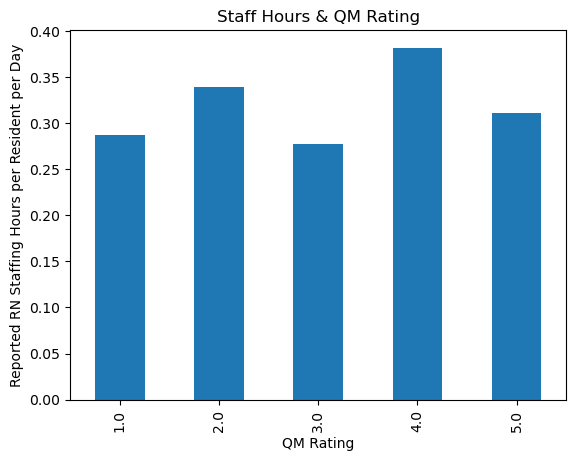

In [186]:
rn_hours=ok_reduced_data.groupby(["QM Rating"]).mean()["Reported RN Staffing Hours per Resident per Day"]
rn_hours.plot(kind='bar')
# plt.bar(QM_Rating,Staffing_hours_per_resident)
plt.ylabel("Reported RN Staffing Hours per Resident per Day")
plt.xlabel("QM Rating")
plt.savefig ("staffinghours.png")
plt.title("Staff Hours & QM Rating")
# plt.show()

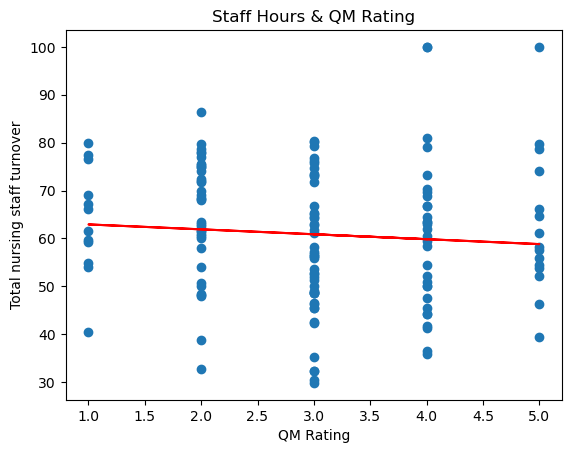

In [187]:
 # Add the linear regression equation and line to plot. Null hypothesis says there is no linear trend. 

y_values = ok_reduced_data['Total nursing staff turnover']
x_values = ok_reduced_data['QM Rating']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Total nursing staff turnover')
plt.xlabel('QM Rating')
plt.title("Staff Hours & QM Rating")
plt.savefig ("turnoverbar.png")
plt.show()

In [188]:
    # 
print(f"The P value between Total nursing staff turnover and QM rating {round(st.pearsonr(Total_nursing_staff_turnover,QM_Rating)[1],2)}")

The P value between Total nursing staff turnover and QM rating 0.34
